1.import and csv upload

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load data from GitHub
url = 'https://raw.githubusercontent.com/Prithivi-12/student_performance_prediction/main/StudentsPerformance.csv'
df = pd.read_csv(url)

print("✓ Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

✓ Data loaded successfully!
Dataset shape: (1000, 8)

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


2.Data Preprocessing

In [3]:
# Display basic information
print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
print(df.describe())

# Check for missing values
print("\n" + "="*60)
print("MISSING VALUES CHECK")
print("="*60)
print(df.isnull().sum())

# Check for duplicates
print("\n" + "="*60)
print("DUPLICATE CHECK")
print("="*60)
duplicates = df.duplicated().sum()
print(f"Duplicates found: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✓ Removed {duplicates} duplicate rows")
else:
    print("✓ No duplicates found")

# Store original data before encoding
df_original = df.copy()
print("\n✓ Saved original data as 'df_original'")

# Create encoded dataframe
df_encoded = df.copy()
print("✓ Created 'df_encoded' for processing")

# Encode categorical variables
print("\n" + "="*60)
print("ENCODING CATEGORICAL VARIABLES")
print("="*60)

label_encoders = {}
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education',
                    'lunch', 'test preparation course']

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"✓ Encoded '{col}'")

# Display comparison
print("\n" + "="*60)
print("ORIGINAL DATA (Before Encoding)")
print("="*60)
print(df_original.head())

print("\n" + "="*60)
print("ENCODED DATA (After Encoding)")
print("="*60)
print(df_encoded.head())

print("\n" + "="*60)
print("✅ DATA PREPROCESSING COMPLETE")
print("="*60)

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

STATISTICAL SUMMARY
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000    

3.Exploratory Data Analysis (EDA)

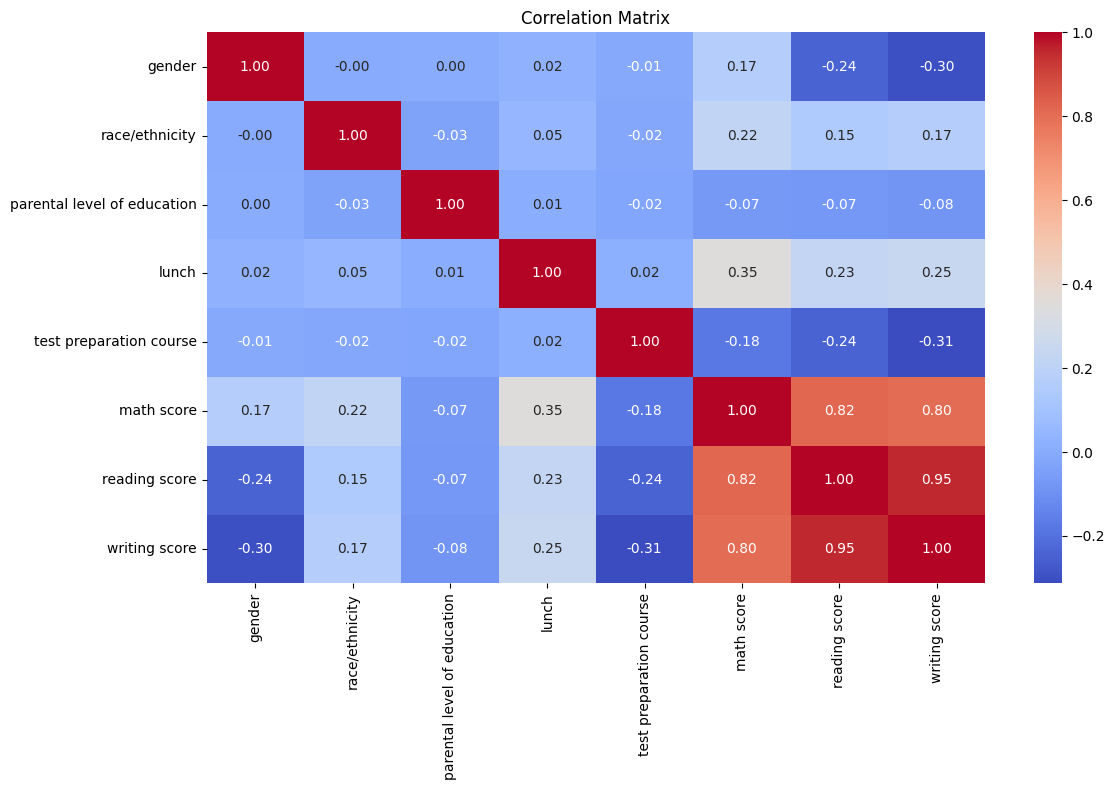

✓ Correlation heatmap saved as 'correlation_heatmap.png'


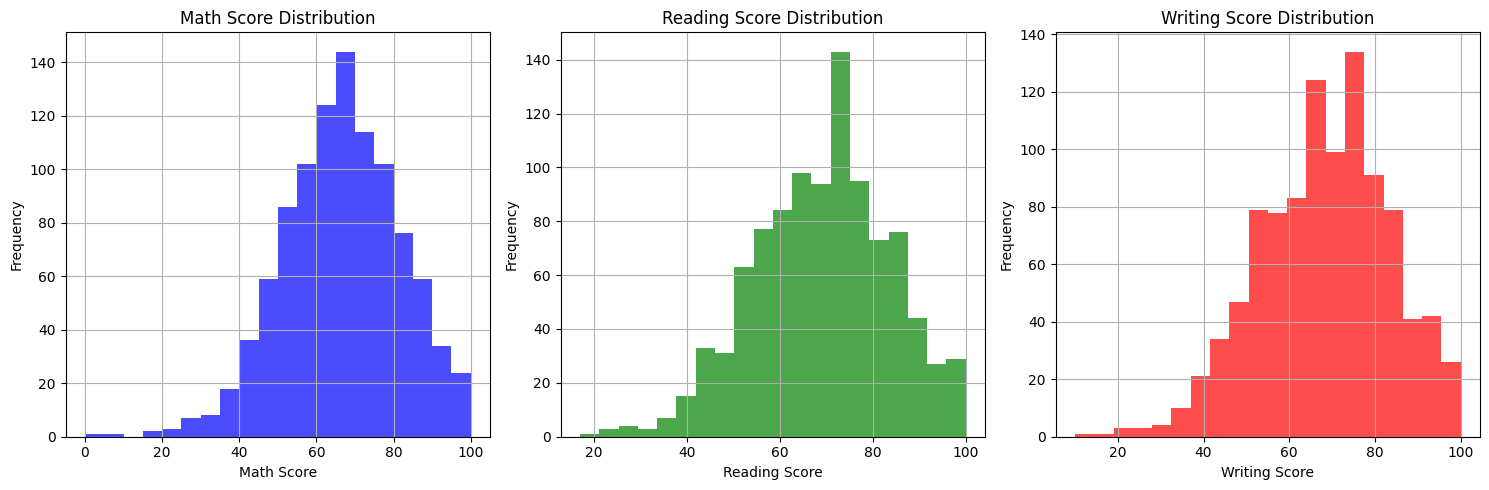

✓ Score distributions saved as 'score_distributions.png'


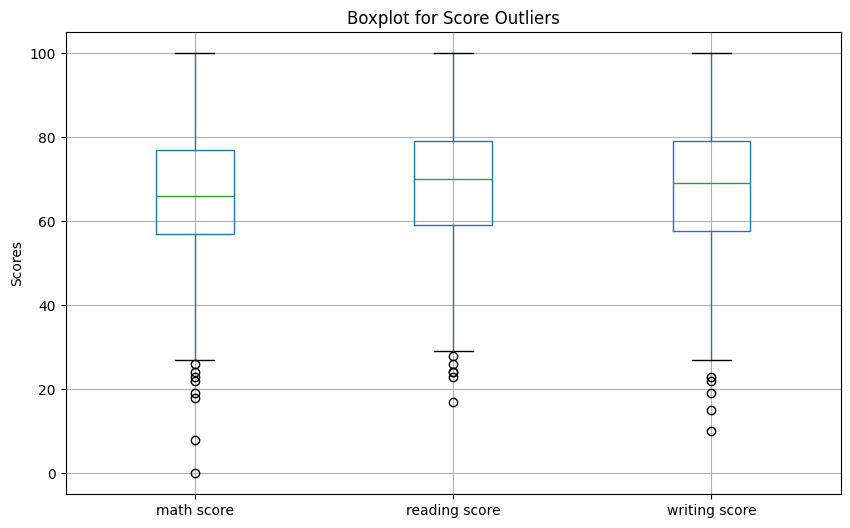

✓ Boxplot saved as 'outlier_boxplot.png'

✅ EXPLORATORY DATA ANALYSIS COMPLETE


In [4]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()
print("✓ Correlation heatmap saved as 'correlation_heatmap.png'")

# Score distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df_original['math score'].hist(bins=20, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Math Score Distribution')
axes[0].set_xlabel('Math Score')
axes[0].set_ylabel('Frequency')

df_original['reading score'].hist(bins=20, ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Reading Score Distribution')
axes[1].set_xlabel('Reading Score')
axes[1].set_ylabel('Frequency')

df_original['writing score'].hist(bins=20, ax=axes[2], color='red', alpha=0.7)
axes[2].set_title('Writing Score Distribution')
axes[2].set_xlabel('Writing Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('score_distributions.png')
plt.show()
print("✓ Score distributions saved as 'score_distributions.png'")

# Boxplot for outlier detection
plt.figure(figsize=(10, 6))
df_original[['math score', 'reading score', 'writing score']].boxplot()
plt.title('Boxplot for Score Outliers')
plt.ylabel('Scores')
plt.savefig('outlier_boxplot.png')
plt.show()
print("✓ Boxplot saved as 'outlier_boxplot.png'")

print("\n" + "="*60)
print("✅ EXPLORATORY DATA ANALYSIS COMPLETE")
print("="*60)


4.Feature Engineering & Selection

In [5]:
# Create average score feature
df_original['average_score'] = (df_original['math score'] +
                                  df_original['reading score'] +
                                  df_original['writing score']) / 3
df_encoded['average_score'] = df_original['average_score']
print("✓ Created 'average_score' feature")

# Define features (X) and target (y)
X = df_encoded[['gender', 'race/ethnicity', 'parental level of education',
                'lunch', 'test preparation course', 'reading score', 'writing score']]
y = df_encoded['math score']

print("\n" + "="*60)
print("FEATURE SELECTION")
print("="*60)
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nSelected Features: {list(X.columns)}")
print(f"Target Variable: math score")

print("\n" + "="*60)
print("✅ FEATURE ENGINEERING & SELECTION COMPLETE")
print("="*60)


✓ Created 'average_score' feature

FEATURE SELECTION
Features (X): (1000, 7)
Target (y): (1000,)

Selected Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score']
Target Variable: math score

✅ FEATURE ENGINEERING & SELECTION COMPLETE


5.Model Building

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("="*60)
print("DATA SPLITTING")
print("="*60)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\n✓ Feature scaling applied")

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

print("\n" + "="*60)
print("MODEL TRAINING")
print("="*60)

# Train all models
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    print(f"✓ {name} trained successfully")

print("\n" + "="*60)
print("✅ MODEL BUILDING COMPLETE")
print("="*60)


DATA SPLITTING
Training set: (800, 7)
Test set: (200, 7)

✓ Feature scaling applied

MODEL TRAINING

Training Linear Regression...
✓ Linear Regression trained successfully

Training Ridge Regression...
✓ Ridge Regression trained successfully

Training Decision Tree...
✓ Decision Tree trained successfully

Training Random Forest...
✓ Random Forest trained successfully

Training Gradient Boosting...
✓ Gradient Boosting trained successfully

✅ MODEL BUILDING COMPLETE


6.Model Evaluation & Comparison

MODEL EVALUATION

Linear Regression:
  RMSE: 5.32
  MAE: 4.13
  R2 Score: 0.8838

Ridge Regression:
  RMSE: 5.32
  MAE: 4.13
  R2 Score: 0.8838

Decision Tree:
  RMSE: 7.78
  MAE: 5.99
  R2 Score: 0.7510

Random Forest:
  RMSE: 6.06
  MAE: 4.69
  R2 Score: 0.8491

Gradient Boosting:
  RMSE: 5.54
  MAE: 4.29
  R2 Score: 0.8738

MODEL COMPARISON TABLE
                       RMSE       MAE  R2 Score
Linear Regression  5.317451  4.130145  0.883803
Ridge Regression   5.317331  4.130188  0.883808
Decision Tree      7.784279  5.985000  0.750985
Random Forest      6.060667  4.693324  0.849051
Gradient Boosting  5.540894  4.285368  0.873832


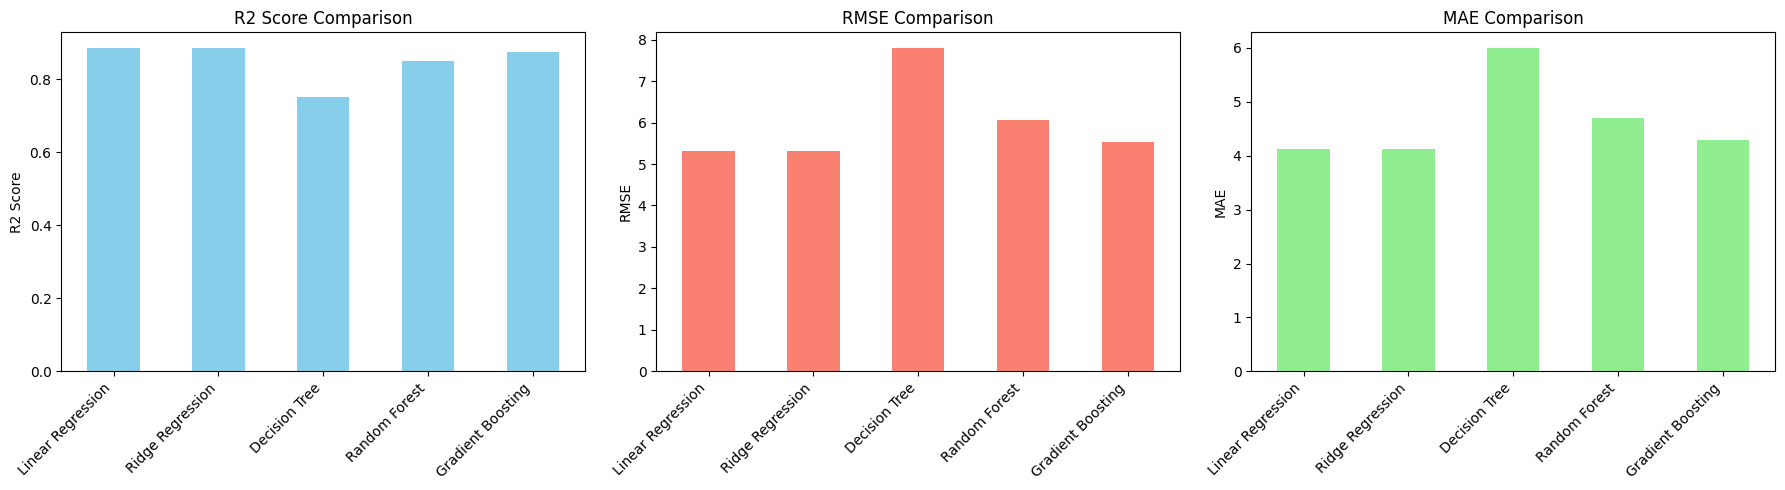


✓ Model comparison chart saved as 'model_comparison.png'

BEST MODEL SELECTION
🏆 Best Model: Ridge Regression
   R2 Score: 0.8838
   RMSE: 5.32
   MAE: 4.13

✅ MODEL EVALUATION & COMPARISON COMPLETE


In [7]:
print("="*60)
print("MODEL EVALUATION")
print("="*60)

results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}

    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2 Score: {r2:.4f}")

# Create comparison dataframe
results_df = pd.DataFrame(results).T

print("\n" + "="*60)
print("MODEL COMPARISON TABLE")
print("="*60)
print(results_df)

# Visualization of model comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

results_df['R2 Score'].plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('R2 Score Comparison')
ax[0].set_ylabel('R2 Score')
ax[0].set_xticklabels(results_df.index, rotation=45, ha='right')

results_df['RMSE'].plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('RMSE Comparison')
ax[1].set_ylabel('RMSE')
ax[1].set_xticklabels(results_df.index, rotation=45, ha='right')

results_df['MAE'].plot(kind='bar', ax=ax[2], color='lightgreen')
ax[2].set_title('MAE Comparison')
ax[2].set_ylabel('MAE')
ax[2].set_xticklabels(results_df.index, rotation=45, ha='right')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()
print("\n✓ Model comparison chart saved as 'model_comparison.png'")

# Select best model
best_model_name = results_df['R2 Score'].idxmax()
best_model = trained_models[best_model_name]

print("\n" + "="*60)
print("BEST MODEL SELECTION")
print("="*60)
print(f"🏆 Best Model: {best_model_name}")
print(f"   R2 Score: {results_df.loc[best_model_name, 'R2 Score']:.4f}")
print(f"   RMSE: {results_df.loc[best_model_name, 'RMSE']:.2f}")
print(f"   MAE: {results_df.loc[best_model_name, 'MAE']:.2f}")

print("\n" + "="*60)
print("✅ MODEL EVALUATION & COMPARISON COMPLETE")
print("="*60)



7.Prediction Function

In [8]:
def predict_performance(gender, race, parent_edu, lunch, test_prep, reading, writing):
    """
    Predict math score based on student characteristics and other scores.

    Parameters:
    - gender: 0 (Female) or 1 (Male)
    - race: 0-4 (Group A-E)
    - parent_edu: 0-5 (Some High School to Master's Degree)
    - lunch: 0 (Standard) or 1 (Free/Reduced)
    - test_prep: 0 (None) or 1 (Completed)
    - reading: Reading score (0-100)
    - writing: Writing score (0-100)

    Returns:
    - Predicted math score
    """
    input_data = np.array([[gender, race, parent_edu, lunch, test_prep, reading, writing]])
    input_scaled = scaler.transform(input_data)
    prediction = best_model.predict(input_scaled)
    return prediction[0]

# Example predictions
print("="*60)
print("PREDICTION EXAMPLES")
print("="*60)

# Example 1
sample1 = predict_performance(1, 2, 3, 0, 1, 75, 78)
print(f"\nExample 1:")
print(f"  Gender: Male, Race: Group C, Parent Edu: Associate's")
print(f"  Lunch: Standard, Test Prep: Completed")
print(f"  Reading: 75, Writing: 78")
print(f"  Predicted Math Score: {sample1:.2f}")

# Example 2
sample2 = predict_performance(0, 4, 5, 0, 1, 90, 88)
print(f"\nExample 2:")
print(f"  Gender: Female, Race: Group E, Parent Edu: Master's")
print(f"  Lunch: Standard, Test Prep: Completed")
print(f"  Reading: 90, Writing: 88")
print(f"  Predicted Math Score: {sample2:.2f}")

# Example 3
sample3 = predict_performance(1, 0, 1, 1, 0, 55, 52)
print(f"\nExample 3:")
print(f"  Gender: Male, Race: Group A, Parent Edu: High School")
print(f"  Lunch: Free/Reduced, Test Prep: None")
print(f"  Reading: 55, Writing: 52")
print(f"  Predicted Math Score: {sample3:.2f}")

print("\n" + "="*60)
print("✅ PREDICTION FUNCTION READY")
print("="*60)


PREDICTION EXAMPLES

Example 1:
  Gender: Male, Race: Group C, Parent Edu: Associate's
  Lunch: Standard, Test Prep: Completed
  Reading: 75, Writing: 78
  Predicted Math Score: 79.41

Example 2:
  Gender: Female, Race: Group E, Parent Edu: Master's
  Lunch: Standard, Test Prep: Completed
  Reading: 90, Writing: 88
  Predicted Math Score: 79.62

Example 3:
  Gender: Male, Race: Group A, Parent Edu: High School
  Lunch: Free/Reduced, Test Prep: None
  Reading: 55, Writing: 52
  Predicted Math Score: 55.78

✅ PREDICTION FUNCTION READY


8.Save Models

In [9]:
import pickle

print("="*60)
print("SAVING MODELS")
print("="*60)

# Save best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("✓ best_model.pkl saved")

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ scaler.pkl saved")

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("✓ label_encoders.pkl saved")

# Save model comparison results
results_df.to_csv('model_comparison_results.csv')
print("✓ model_comparison_results.csv saved")

print("\n" + "="*60)
print("✅ ALL MODELS SAVED SUCCESSFULLY")
print("="*60)

SAVING MODELS
✓ best_model.pkl saved
✓ scaler.pkl saved
✓ label_encoders.pkl saved
✓ model_comparison_results.csv saved

✅ ALL MODELS SAVED SUCCESSFULLY


9.Deployment with Streamlit

In [10]:
!pip install ipywidgets -q

import pickle
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Load models
model = pickle.load(open('best_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

print("✓ Models loaded successfully!\n")

# Create interactive widgets
display(HTML("""
<div style='background-color: #2ecc71; padding: 20px; border-radius: 10px; text-align: center;'>
    <h1 style='color: white; margin: 0;'>🎓 Student Performance Prediction System</h1>
    <p style='color: white; margin: 5px 0 0 0;'>Predict math scores based on student factors</p>
</div>
<br>
"""))

gender = widgets.Dropdown(
    options=['Female', 'Male'],
    value='Male',
    description='Gender:',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='400px')
)

race = widgets.Dropdown(
    options=['Group A', 'Group B', 'Group C', 'Group D', 'Group E'],
    value='Group B',
    description='Race/Ethnicity:',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='400px')
)

parent_edu = widgets.Dropdown(
    options=['Some High School', 'High School', 'Some College',
             "Associate's Degree", "Bachelor's Degree", "Master's Degree"],
    value="Bachelor's Degree",
    description='Parent Education:',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='400px')
)

lunch = widgets.Dropdown(
    options=['Standard', 'Free/Reduced'],
    value='Standard',
    description='Lunch Type:',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='400px')
)

test_prep = widgets.Dropdown(
    options=['None', 'Completed'],
    value='None',
    description='Test Prep:',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='400px')
)

reading_score = widgets.IntSlider(
    value=68,
    min=0,
    max=100,
    step=1,
    description='Reading Score:',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='500px'),
    continuous_update=False
)

writing_score = widgets.IntSlider(
    value=81,
    min=0,
    max=100,
    step=1,
    description='Writing Score:',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='500px'),
    continuous_update=False
)

button = widgets.Button(
    description='🎯 Predict Math Score',
    button_style='success',
    layout=widgets.Layout(width='250px', height='50px')
)

output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()

        # Encode inputs
        gender_enc = 1 if gender.value == 'Male' else 0
        race_enc = ord(race.value[-1]) - ord('A')
        parent_edu_mapping = {
            'Some High School': 0,
            'High School': 1,
            'Some College': 2,
            "Associate's Degree": 3,
            "Bachelor's Degree": 4,
            "Master's Degree": 5
        }
        parent_edu_enc = parent_edu_mapping.get(parent_edu.value, 2)
        lunch_enc = 0 if lunch.value == 'Standard' else 1
        test_prep_enc = 1 if test_prep.value == 'Completed' else 0

        # Make prediction
        input_data = np.array([[gender_enc, race_enc, parent_edu_enc, lunch_enc,
                               test_prep_enc, reading_score.value, writing_score.value]])
        input_scaled = scaler.transform(input_data)
        prediction = model.predict(input_scaled)[0]

        # Display results with styling
        if prediction >= 80:
            color = '#2ecc71'
            emoji = '🌟'
            message = 'Excellent Performance!'
        elif prediction >= 60:
            color = '#3498db'
            emoji = '👍'
            message = 'Good Performance!'
        else:
            color = '#e74c3c'
            emoji = '📚'
            message = 'Needs Improvement'

        display(HTML(f"""
        <div style='background-color: {color}; padding: 30px; border-radius: 10px; text-align: center; margin-top: 20px;'>
            <h2 style='color: white; margin: 0;'>📊 Prediction Result</h2>
            <h1 style='color: white; font-size: 48px; margin: 10px 0;'>{prediction:.2f}/100</h1>
            <h3 style='color: white; margin: 0;'>{emoji} {message}</h3>
        </div>
        """))

button.on_click(predict_score)

# Display all widgets
display(gender)
display(race)
display(parent_edu)
display(lunch)
display(test_prep)
display(reading_score)
display(writing_score)
display(HTML("<br>"))
display(button)
display(output)


✓ Models loaded successfully!



Dropdown(description='Gender:', index=1, layout=Layout(width='400px'), options=('Female', 'Male'), style=Descr…

Dropdown(description='Race/Ethnicity:', index=1, layout=Layout(width='400px'), options=('Group A', 'Group B', …

Dropdown(description='Parent Education:', index=4, layout=Layout(width='400px'), options=('Some High School', …

Dropdown(description='Lunch Type:', layout=Layout(width='400px'), options=('Standard', 'Free/Reduced'), style=…

Dropdown(description='Test Prep:', layout=Layout(width='400px'), options=('None', 'Completed'), style=Descript…

IntSlider(value=68, continuous_update=False, description='Reading Score:', layout=Layout(width='500px'), style…

IntSlider(value=81, continuous_update=False, description='Writing Score:', layout=Layout(width='500px'), style…

Button(button_style='success', description='🎯 Predict Math Score', layout=Layout(height='50px', width='250px')…

Output()